![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Customer Analysis
### Abstract <a class="anchor" id="LF1"></a>
The objective of this data is to understand customer demographics and buying behavior. We will use `predictive analytics` to analyze the most profitable customers and how they interact. After that, we will take `targeted actions` **to increase** profitable customer response, retention, and growth.

For this lab, we will use the dataset from `marketing_customer_analysis.csv` which contains 9134 customers data.



### Machine Learning process

1. [Abstract](#LF1) | Case Study
2. [Data Collection](#LF2) | Get Data
3. [Data Cleaning/Wrangling/EDA](#LF3) | Cleaning, Exploration
4. [Data Preprocessing](#LF4) | Processing Data
5. [Data Prediction](#LF5) | Modeling & Validation
6. [Conclusions](#LF6) | Reporting


### Results

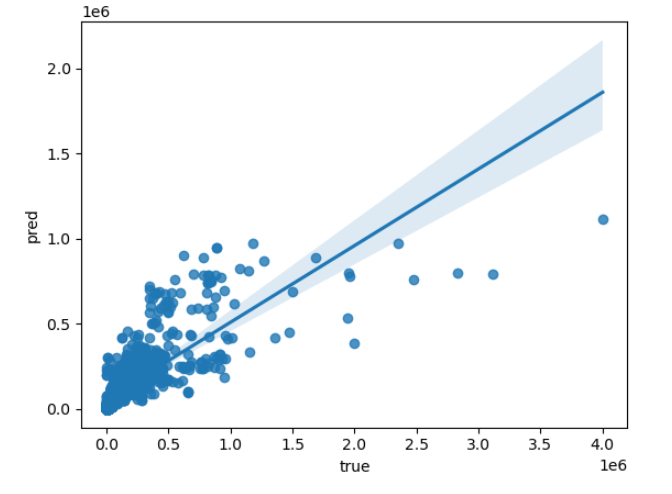

### Conclusions <a class="anchor" id="LF6"></a>
* Removing the outliers helped to the accuracy of this dataset.

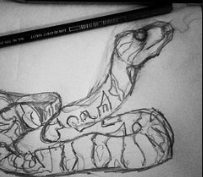
##### Isidre Munné-Bertran

### Data Collection <a class="anchor" id=LF2></a>

In [1]:
# Firstly, libraries:

import pandas as pd # data manipulation and analysis.
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # plots visualizations
import seaborn as sns # HD plots graphics based on matplot
import scipy.stats as stats # statistical functions
import math #to apply absolute value

# Machine Learning
from sklearn.preprocessing import OneHotEncoder # oneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn import linear_model # Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # to test the Machine Learning model

# Lastly... no more warnings... HURRAY !!!!
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Defining our functions:

def data_explorer(): # first exploration
    print("The dataframe shape is", data.shape, ".")
    print(" ")
    print("The dataframe columns are:")
    print(data.columns)
    print(" ")
    print("The dataframe data types are:")
    print(data.dtypes)
    return data.sample(5) # random sample

def data_cleaning(): # to standarize column names
    data.columns = cc = [column.lower().replace(' ', '_') for column in data] # standarizing the columns
    print(data.columns)
    print()
    
def num_or_cat(): # to categoricals and numericals
    print("The following columns are numerical")
    X_N = data_copy.select_dtypes(include= np.number).fillna(0) # fixs NaN numerical values
    print(X_N.columns)
    print()
    print("The following columns are categorical")
    X_C = data_copy.select_dtypes(exclude=np.number).fillna("") # fixs NaN categorical values
    print(X_C.columns)

#### Reading the Data

In [3]:
data = pd.read_csv('marketing_customer_analysis.csv') # Opening the Data
data_explorer()

The dataframe shape is (9134, 24) .
 
The dataframe columns are:
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
 
The dataframe data types are:
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                       

Customer       State  Customer Lifetime Value Response Coverage  \
6729  FG63647      Nevada             12877.776500       No  Premium   
2639  ME83611      Nevada              2530.705137      Yes    Basic   
43    SR38658     Arizona             12231.879680       No    Basic   
7333  RF73329  California              2674.227315       No    Basic   
7373  FP10040      Oregon              8598.185237       No    Basic   

                 Education Effective To Date EmploymentStatus Gender  Income  \
6729              Bachelor           1/25/11       Unemployed      M       0   
2639              Bachelor           1/21/11         Employed      F   89451   
43    High School or Below            2/8/11         Employed      M   43244   
7333  High School or Below           1/17/11         Employed      F   33451   
7373  High School or Below           1/23/11         Employed      M   38113   

      ... Months Since Policy Inception Number of Open Complaints  \
6729  ...                            89                         0   
2639  ...                             2                         0   
43    ...                            16                         0   
7333  ...                             1                         0   
7373  ...                            34                         0   

      Number of Policies    Policy Type       Policy  Renew Offer Type  \
6729                   2  Personal Auto  Personal L1            Offer2   
2639                   1  Personal Auto  Personal L3            Offer2   
43                     2  Personal Auto  Personal L2            Offer4   
7333                   1  Personal Auto  Personal L2            Offer2   
7373                   2  Personal Auto  Personal L1            Offer3   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
6729          Agent         561.600000  Four-Door Car      Medsize  
2639            Web          61.769564  Four-Door Car      Medsize  
43            Agent         494.400000     Sports Car      Medsize  
7333          Agent         337.219884  Four-Door Car      Medsize  
7373          Agent         203.640251  Four-Door Car        Large  

[5 rows x 24 columns]

#### Data Exploration I

In [4]:
data_explorer()

The dataframe shape is (9134, 24) .
 
The dataframe columns are:
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
 
The dataframe data types are:
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                       

Customer       State  Customer Lifetime Value Response  Coverage  \
1493  TW16499  California              3633.054030       No  Extended   
5493  HC25359      Oregon              9045.111945       No   Premium   
8937  LZ57827  California             13931.350670       No     Basic   
4444  GQ15708      Oregon             14503.021290       No     Basic   
8069  JV79596      Oregon             14594.452350       No     Basic   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
1493  Bachelor           2/28/11         Employed      M   43334  ...   
5493    Master            1/6/11         Employed      F   52572  ...   
8937  Bachelor           1/12/11         Employed      M   37695  ...   
4444  Bachelor           1/31/11    Medical Leave      M   29790  ...   
8069  Bachelor            1/1/11         Disabled      F   27627  ...   

     Months Since Policy Inception Number of Open Complaints  \
1493                            72                         2   
5493                            22                         0   
8937                            62                         0   
4444                            49                         0   
8069                            43                         0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
1493                   1  Corporate Auto  Corporate L2            Offer4   
5493                   3   Personal Auto   Personal L2            Offer1   
8937                   2   Personal Auto   Personal L2            Offer1   
4444                   3   Personal Auto   Personal L2            Offer1   
8069                   2    Special Auto    Special L2            Offer3   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
1493    Call Center         614.367195   Two-Door Car        Small  
5493          Agent         441.623031  Four-Door Car      Medsize  
8937         Branch         352.311743            SUV      Medsize  
4444          Agent         931.200000     Luxury SUV      Medsize  
8069    Call Center         453.600000   Two-Door Car        Small  

[5 rows x 24 columns]

In [5]:
# Checking for duplicates to delete them (if there are any)
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9129    False
9130    False
9131    False
9132    False
9133    False
Length: 9134, dtype: bool

This dataset has 9134 customers unique data in 24 columns. 
* The features that might be useful for the purpose of our analysis are **customer demographics** like `Income`, `State`, `Education` and `EmploymentStatus`.
* Also, since we want to know their **buying behavior** we will need data from numerical features such as `Vehicle Class`, `Monthly Premium Auto` or `Policy Type`
* The target for our dataset will be `Total Claim Amount`.

### Data Cleaning/Wrangling/EDA <a class="anchor" id=LF3></a>

#### Data Cleaning

In [6]:
data_cleaning() # to standarize the column names

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')



In [7]:
# For readibility we will have our target at the end of the index.
data_copy = data.copy() # as best practices, we make a copy of our data
data_copy = data_copy[['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'total_claim_amount']]
data_copy.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'total_claim_amount'],
      dtype='object')

In [8]:
# Now, we will drop the columns 'costumer' (they only contain ID information) and 'effective_to_date' (it does not contain any valuable data)
data_copy = data_copy.drop(['customer', 'effective_to_date'], axis = 1)

In [9]:
# we assign numerical and categorical features to new variables
print("The following columns are numerical")
X_N = data_copy.select_dtypes(include= np.number).fillna(0) # fixs NaN numerical values
print(X_N.columns)
print()
print("The following columns are categorical")
X_C = data_copy.select_dtypes(exclude=np.number).fillna("") # fixs NaN categorical values
print(X_C.columns)

The following columns are numerical
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

The following columns are categorical
Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


### Exploratory Data Analysis

In [10]:
X_N.describe() # basic statistics for all numerical values

customer_lifetime_value        income  monthly_premium_auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       months_since_last_claim  months_since_policy_inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       number_of_open_complaints  number_of_policies  total_claim_amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

#### Preprocessing

#### Dealing with numerical values

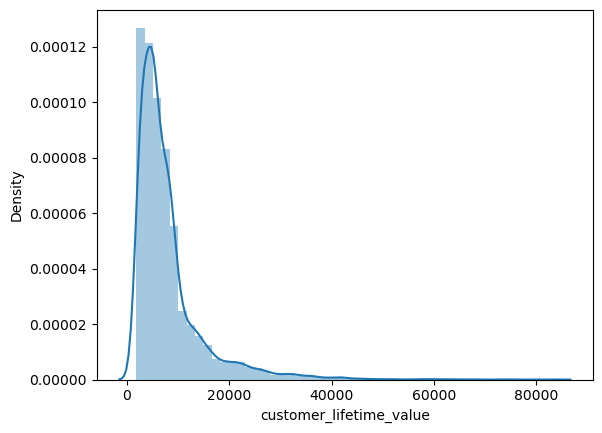

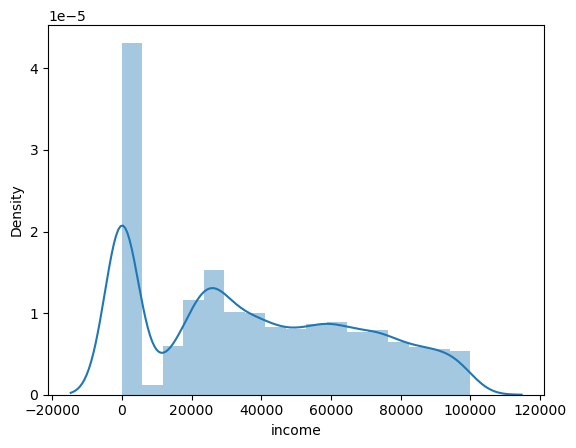

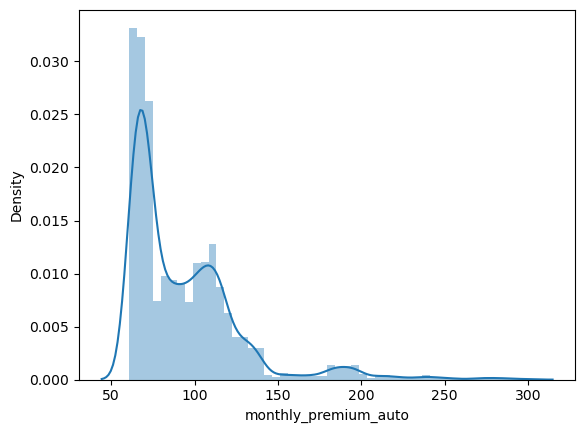

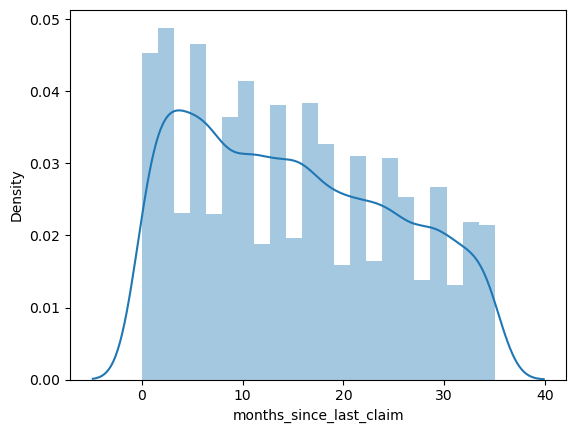

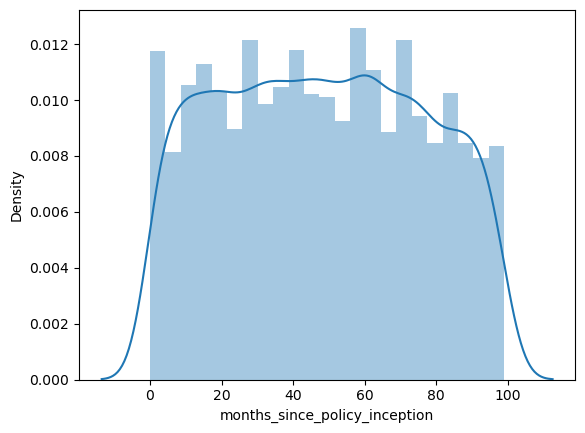

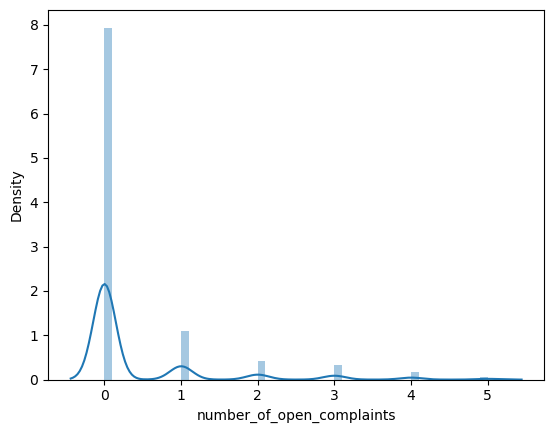

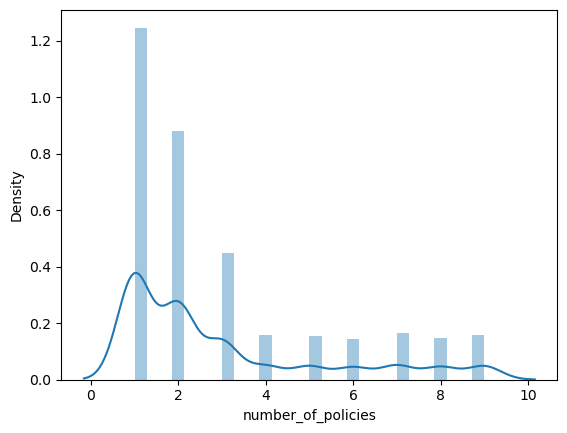

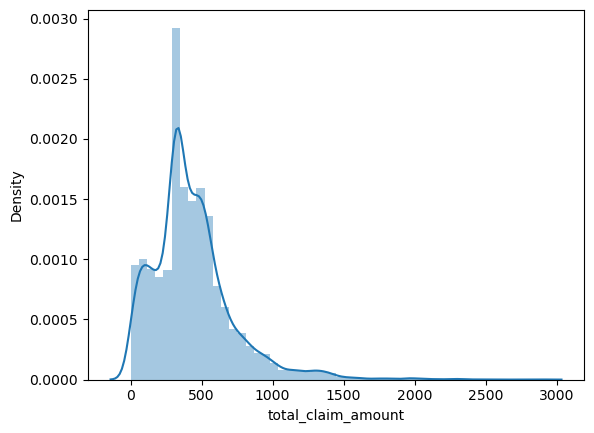

In [11]:
for column in X_N:
    sns.distplot(X_N[column])
    plt.show()

In [12]:
# only "months_since_last_claim" and "months_since_policy_inception" show a bell-shape normal distribution

In [13]:
# We will check for multicollinearity. AKA Checking correlation between features (we don't want that)
# We will drop any that show a high correlation between them (greater than 0.9). 
cr_data = X_N.corr()
cr_data = round(cr_data, 2)
cr_data

customer_lifetime_value  income  \
customer_lifetime_value                           1.00    0.02   
income                                            0.02    1.00   
monthly_premium_auto                              0.40   -0.02   
months_since_last_claim                           0.01   -0.03   
months_since_policy_inception                     0.01   -0.00   
number_of_open_complaints                        -0.04    0.01   
number_of_policies                                0.02   -0.01   
total_claim_amount                                0.23   -0.36   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                        0.40                     0.01   
income                                        -0.02                    -0.03   
monthly_premium_auto                           1.00                     0.01   
months_since_last_claim                        0.01                     1.00   
months_since_policy_inception                  0.02                    -0.04   
number_of_open_complaints                     -0.01                     0.01   
number_of_policies                            -0.01                     0.01   
total_claim_amount                             0.63                     0.01   

                               months_since_policy_inception  \
customer_lifetime_value                                 0.01   
income                                                 -0.00   
monthly_premium_auto                                    0.02   
months_since_last_claim                                -0.04   
months_since_policy_inception                           1.00   
number_of_open_complaints                              -0.00   
number_of_policies                                     -0.01   
total_claim_amount                                      0.00   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                            -0.04                0.02   
income                                              0.01               -0.01   
monthly_premium_auto                               -0.01               -0.01   
months_since_last_claim                             0.01                0.01   
months_since_policy_inception                      -0.00               -0.01   
number_of_open_complaints                           1.00                0.00   
number_of_policies                                  0.00                1.00   
total_claim_amount                                 -0.01               -0.00   

                               total_claim_amount  
customer_lifetime_value                      0.23  
income                                      -0.36  
monthly_premium_auto                         0.63  
months_since_last_claim                      0.01  
months_since_policy_inception                0.00  
number_of_open_complaints                   -0.01  
number_of_policies                          -0.00  
total_claim_amount                           1.00

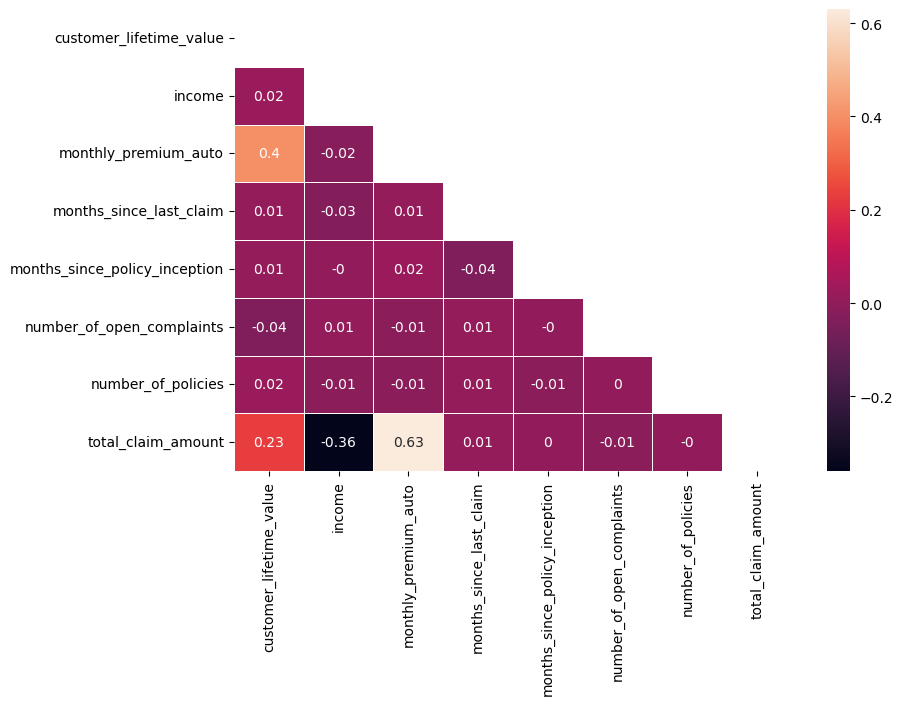

In [14]:
# Heatmap plot
mask = np.zeros_like(cr_data)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(cr_data, mask=mask, annot=True, linewidths=.5, ax=ax)
plt.show()

In [15]:
# There are none to drop

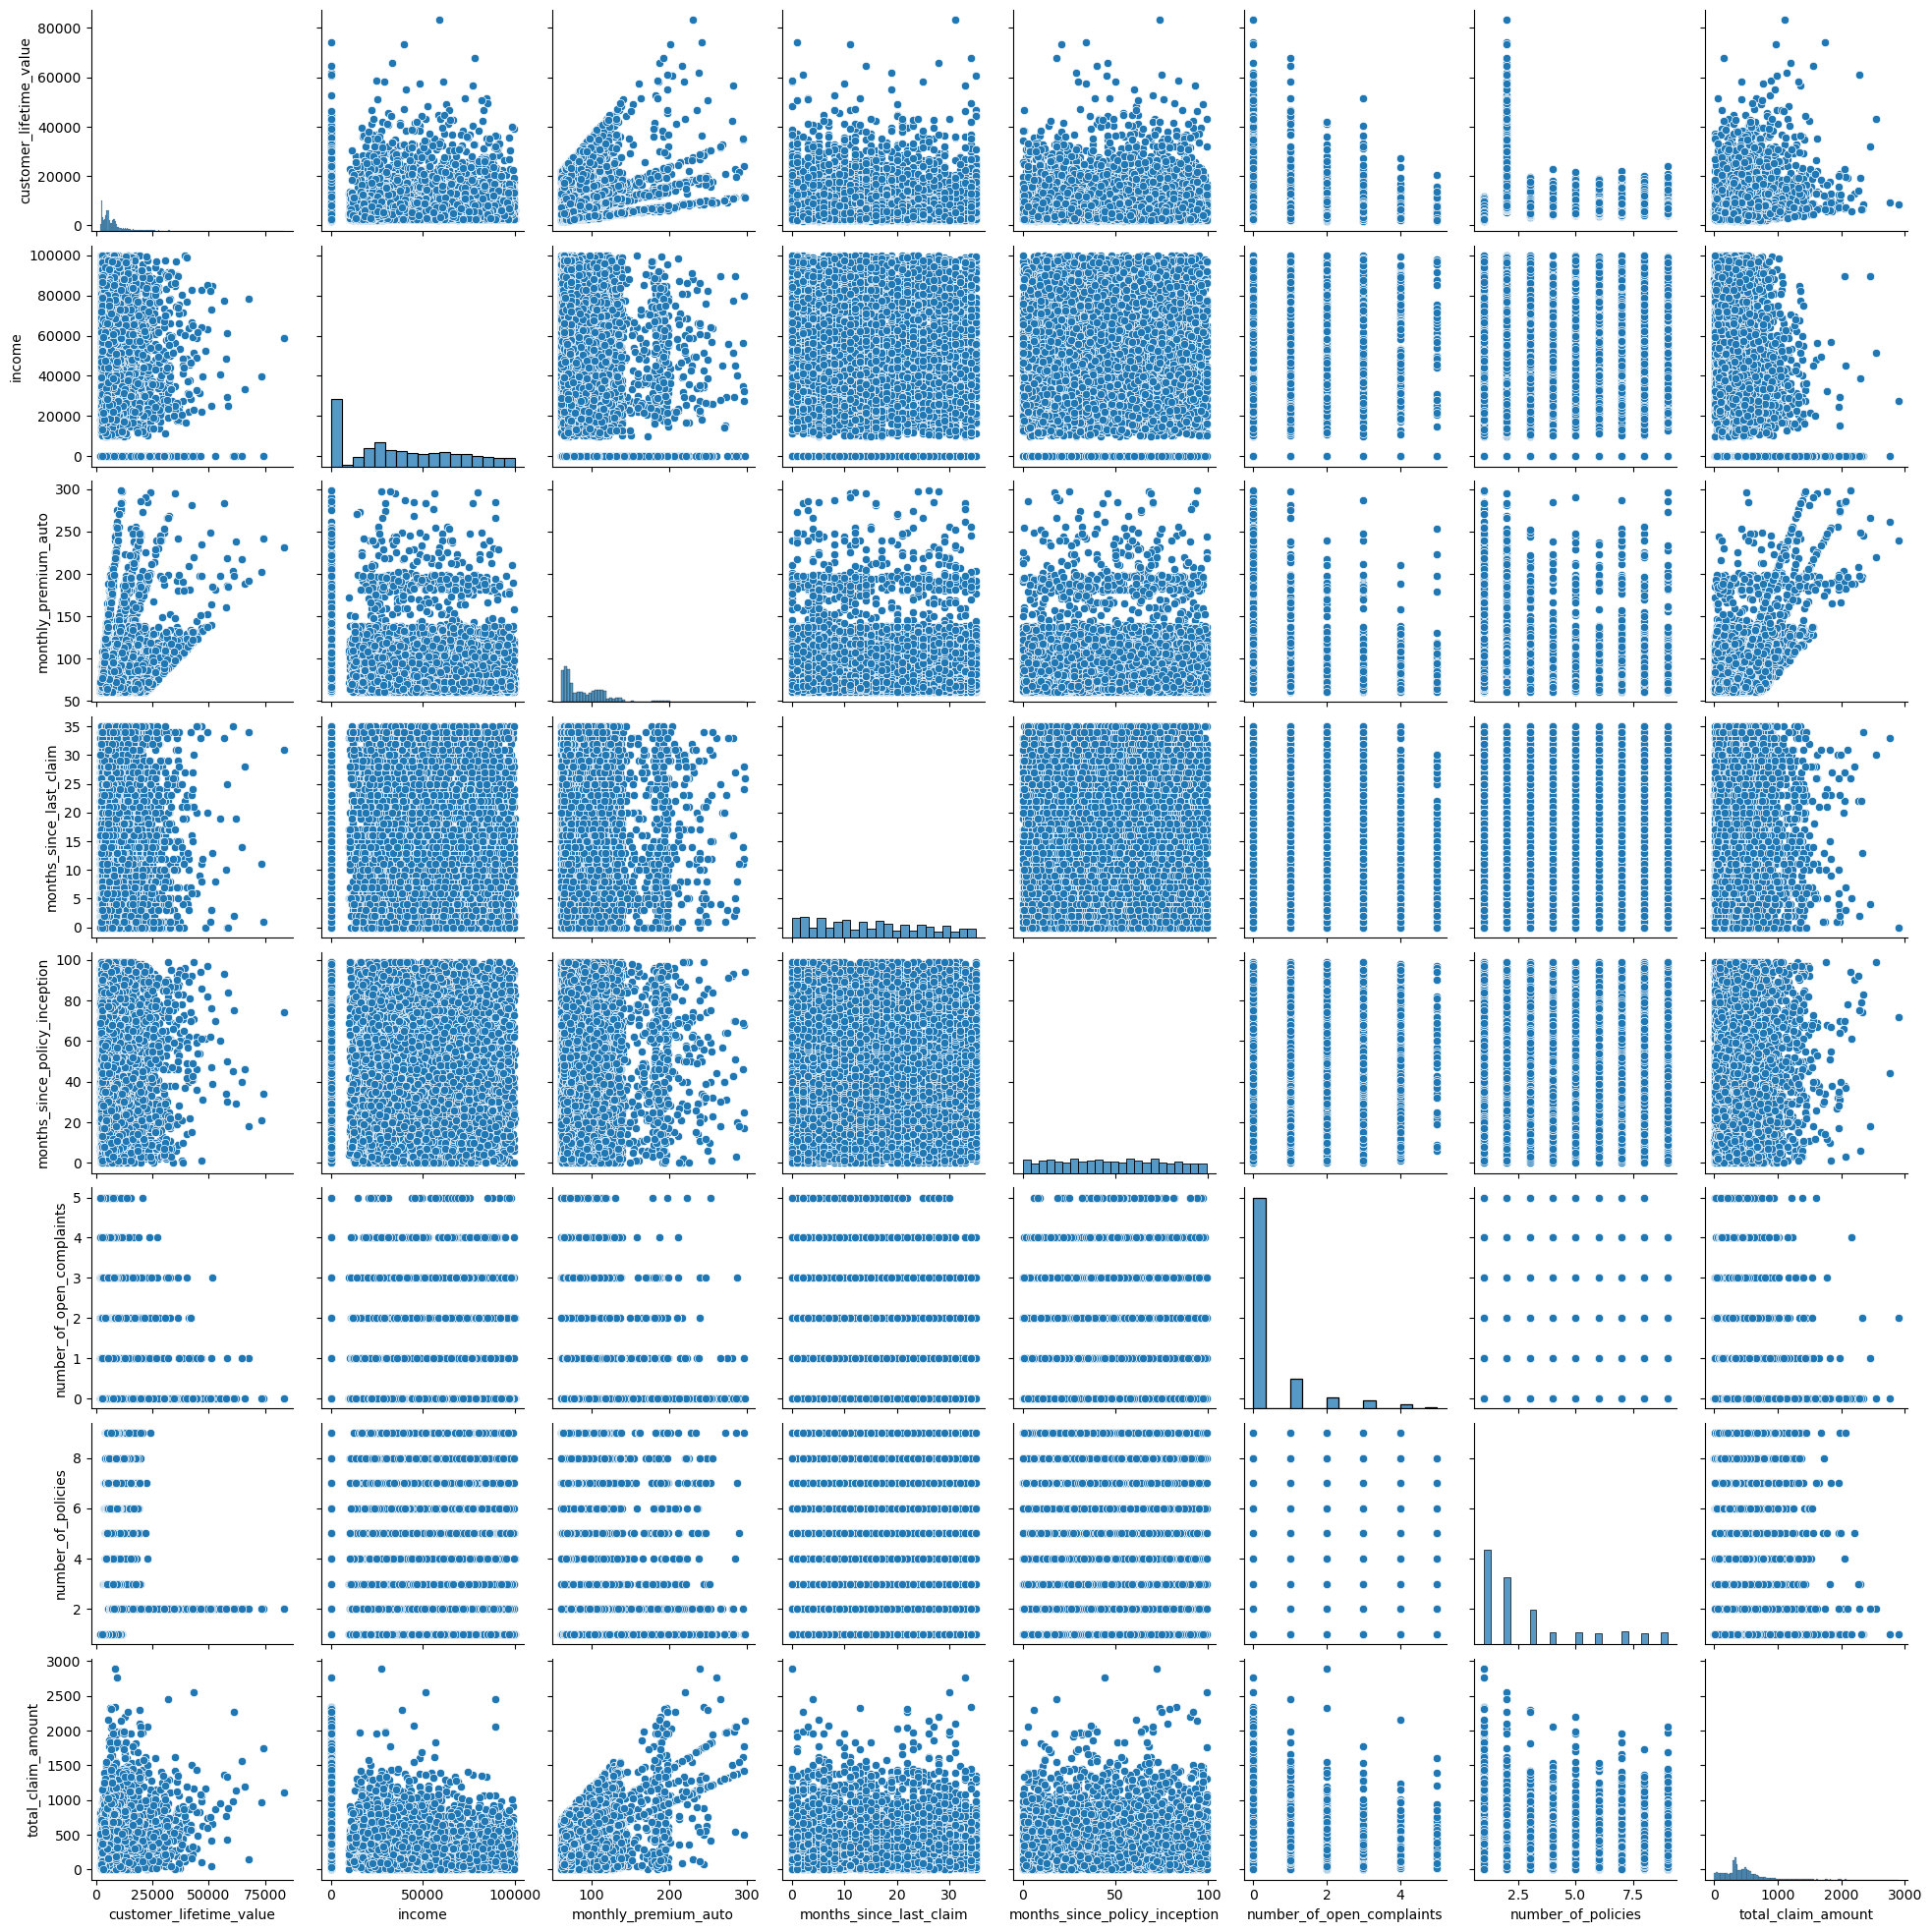

In [16]:
sns.pairplot(X_N)

### Data Processing <a class="anchor" id=LF4></a>

#### One-Hot Encoding for categorical values

In [17]:
X_dumm = pd.get_dummies(X_C, drop_first=False) # You can put X, not separating variables is needed.
X_dumm

state_Arizona  state_California  state_Nevada  state_Oregon  \
0                 0                 0             0             0   
1                 1                 0             0             0   
2                 0                 0             1             0   
3                 0                 1             0             0   
4                 0                 0             0             0   
...             ...               ...           ...           ...   
9129              0                 1             0             0   
9130              0                 1             0             0   
9131              0                 1             0             0   
9132              0                 1             0             0   
9133              0                 1             0             0   

      state_Washington  response_No  response_Yes  coverage_Basic  \
0                    1            1             0               1   
1                    0            1             0               0   
2                    0            1             0               0   
3                    0            1             0               1   
4                    1            1             0               1   
...                ...          ...           ...             ...   
9129                 0            1             0               1   
9130                 0            0             1               0   
9131                 0            1             0               0   
9132                 0            1             0               0   
9133                 0            1             0               0   

      coverage_Extended  coverage_Premium  ...  sales_channel_Web  \
0                     0                 0  ...                  0   
1                     1                 0  ...                  0   
2                     0                 1  ...                  0   
3                     0                 0  ...                  0   
4                     0                 0  ...                  0   
...                 ...               ...  ...                ...   
9129                  0                 0  ...                  1   
9130                  1                 0  ...                  0   
9131                  1                 0  ...                  0   
9132                  1                 0  ...                  0   
9133                  1                 0  ...                  0   

      vehicle_class_Four-Door Car  vehicle_class_Luxury Car  \
0                               0                         0   
1                               1                         0   
2                               0                         0   
3                               0                         0   
4                               1                         0   
...                           ...                       ...   
9129                            1                         0   
9130                            1                         0   
9131                            1                         0   
9132                            1                         0   
9133                            0                         0   

      vehicle_class_Luxury SUV  vehicle_class_SUV  vehicle_class_Sports Car  \
0                            0                  0                         0   
1                            0                  0                         0   
2                            0                  0                         0   
3                            0                  1                         0   
4                            0                  0                         0   
...                        ...                ...                       ...   
9129                         0                  0                         0   
9130                         0                  0                         0   
9131                         0                  0  

In [18]:
# Concat the 2 dataframes
X_concat = pd.concat([X_N, X_dumm], axis=1)
X_concat.sample(5)

customer_lifetime_value  income  monthly_premium_auto  \
1952             22041.856430       0                    65   
8241              2724.262292       0                    70   
2688              2795.410029   40516                    70   
447               8260.639809   33321                   105   
8164              5296.838482       0                    73   

      months_since_last_claim  months_since_policy_inception  \
1952                       11                             15   
8241                       21                             70   
2688                       21                             31   
447                         6                              2   
8164                       33                             44   

      number_of_open_complaints  number_of_policies  total_claim_amount  \
1952                          0                   2          312.000000   
8241                          0                   1          405.384524   
2688                          0                   1          137.168874   
447                           0                   3          504.000000   
8164                          0                   3          152.080908   

      state_Arizona  state_California  ...  sales_channel_Web  \
1952              0                 0  ...                  0   
8241              0                 0  ...                  0   
2688              0                 1  ...                  1   
447               0                 1  ...                  0   
8164              0                 0  ...                  0   

      vehicle_class_Four-Door Car  vehicle_class_Luxury Car  \
1952                            1                         0   
8241                            1                         0   
2688                            0                         0   
447                             0                         0   
8164                            1                         0   

      vehicle_class_Luxury SUV  vehicle_class_SUV  vehicle_class_Sports Car  \
1952                         0                  0                         0   
8241                         0                  0                         0   
2688                         0                  0                         0   
447                          0                  1                         0   
8164                         0                  0                         0   

      vehicle_class_Two-Door Car  vehicle_size_Large  vehicle_size_Medsize  \
1952                           0                   0                     0   
8241                           0                   0                     1   
2688                           1                   0                     0   
447                            0                   0                     1   
8164                           0                   1                     0   

      vehicle_size_Small  
1952                   1  
8241                   0  
2688                   1  
447                    0  
8164                   0  

[5 rows x 65 columns]

#### Dealing with outliers

<AxesSubplot:xlabel='months_since_last_claim'>

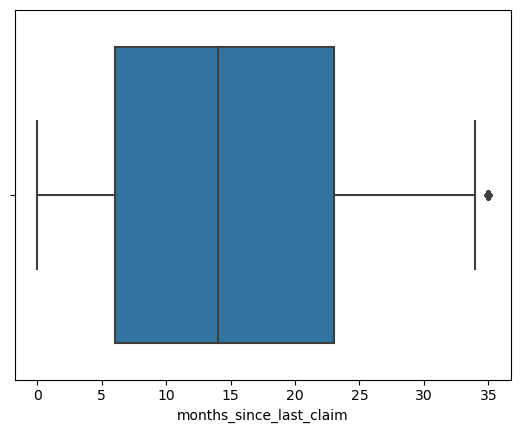

In [21]:
# Fixing outliers from each column
sns.boxplot(x=X_N['months_since_last_claim'], whis=0.7)

<AxesSubplot:xlabel='months_since_policy_inception'>

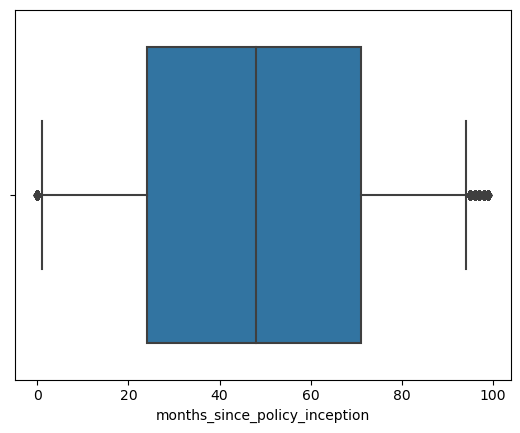

In [22]:
sns.boxplot(x=X_N['months_since_policy_inception'], whis=0.5)

<AxesSubplot:xlabel='customer_lifetime_value'>

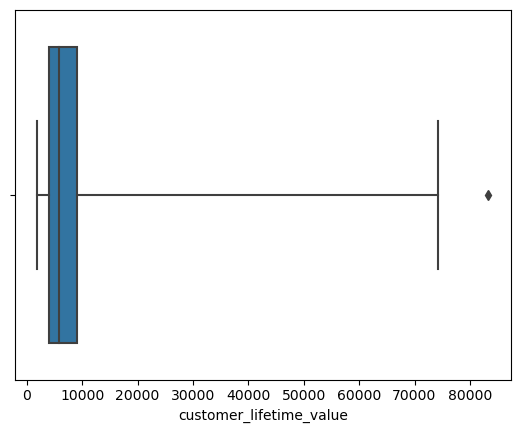

In [23]:
sns.boxplot(x=X_N['customer_lifetime_value'], whis=14.9)

<AxesSubplot:xlabel='income'>

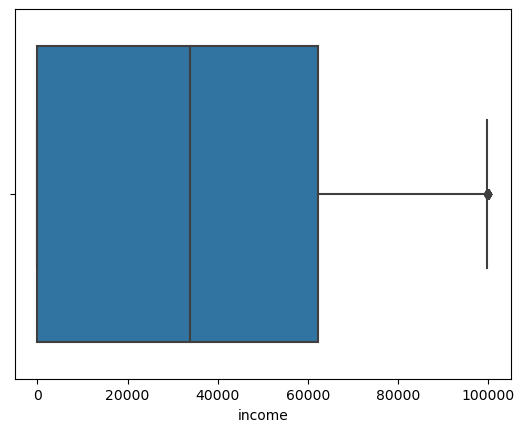

In [24]:
sns.boxplot(x=X_N['income'], whis=0.6)

<AxesSubplot:xlabel='monthly_premium_auto'>

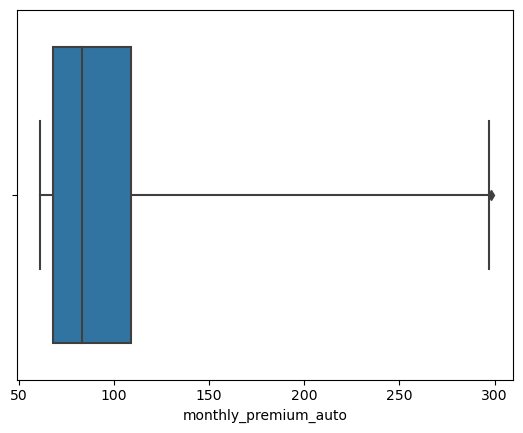

In [25]:
sns.boxplot(x=X_N['monthly_premium_auto'], whis=4.6)

<AxesSubplot:xlabel='number_of_policies'>

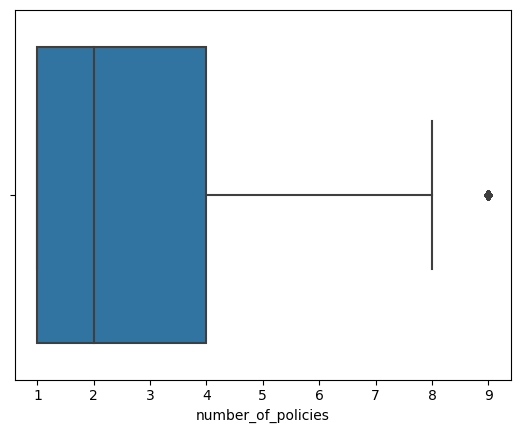

In [26]:
sns.boxplot(x=X_N['number_of_policies'], whis=1.6)

In [29]:
from sklearn.preprocessing import MinMaxScaler # To normalize the data

transformer = MinMaxScaler().fit(X_N) # We use it to normalize
x_minmax = transformer.transform(X_N)

In [ ]:
x_num_norm = pd.DataFrame(x_minmax, columns=X_N.columns) # Selecting x_num.columns for our columns
x_num_norm.sample(5)

### Data Predictions <a class="anchor" id=LF5></a>

#### X-Y Split

In [30]:
Y = data_copy['total_claim_amount']
X = data_copy.drop(['total_claim_amount'], axis=1) 
X.sample(5)

state  customer_lifetime_value response coverage education  \
2114  Washington             24127.504020      Yes    Basic  Bachelor   
1801      Oregon              5682.515346       No    Basic    Doctor   
2536      Oregon              7944.973807       No  Premium   College   
6508  California              5096.673223      Yes    Basic    Master   
1702     Arizona              5764.784159       No    Basic  Bachelor   

     employmentstatus gender  income location_code marital_status  ...  \
2114    Medical Leave      M   14072      Suburban       Divorced  ...   
1801         Employed      F   36938         Urban        Married  ...   
2536       Unemployed      M       0      Suburban         Single  ...   
6508         Disabled      F   22886      Suburban       Divorced  ...   
1702         Employed      M   22134      Suburban        Married  ...   

      months_since_last_claim  months_since_policy_inception  \
2114                       13                              3   
1801                       32                             31   
2536                       10                             97   
6508                        9                             81   
1702                       13                             81   

      number_of_open_complaints  number_of_policies     policy_type  \
2114                          0                   2   Personal Auto   
1801                          0                   3    Special Auto   
2536                          0                   9  Corporate Auto   
6508                          0                   3   Personal Auto   
1702                          0                   3  Corporate Auto   

            policy renew_offer_type sales_channel  vehicle_class vehicle_size  
2114   Personal L2           Offer1         Agent  Four-Door Car      Medsize  
1801    Special L2           Offer1         Agent  Four-Door Car      Medsize  
2536  Corporate L3           Offer1           Web  Four-Door Car      Medsize  
6508   Personal L3           Offer1         Agent  Four-Door Car        Small  
1702  Corporate L2           Offer1   Call Center  Four-Door Car      Medsize  

[5 rows x 21 columns]

In [31]:
# We

#### Train-Test Split

In [32]:
# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X_dumm, Y, test_size=0.3, random_state=42) 
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [33]:
len(X_dumm)*0.7 # Len before the test

6393.799999999999

In [34]:
len(X_test) # Len after the test

2741

#### Applying Linear Regression

In [35]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

#### Model Validation

In [36]:
predictions = model.predict(X_test)

#### r2, RMSE and MSE

In [37]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.7435590457853245, 144.68717964478077, 20934.37995356106)

In [38]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  0.7435590457853245
RMSE =  144.68717964478077
The value of the metric MSE is  20934.37995356106
MAE =  97.71234714483764


In [39]:
# r2 = Kind of good, it is closer to 1
# RMSE = It's 114. We will compare it with our target:
data_copy['total_claim_amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

#### Futher improving the model

In [40]:
df_trans = data_copy.copy()

def boxcox_transform(df):
    numeric_cols = df_trans.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df_trans[column] = np.where(df_trans[column]<=0, np.NAN, df_trans[column]) 
        df_trans[column] = df_trans[column].fillna(df_trans[column].mean())
        transformed_data, ci = stats.boxcox(df_trans[column])
        df_trans[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci
df, _ci = boxcox_transform(df_trans)
df_trans.head()

state  customer_lifetime_value response  coverage education  \
0  Washington                 2.703839       No     Basic  Bachelor   
1     Arizona                 2.754926       No  Extended  Bachelor   
2      Nevada                 2.780772       No   Premium  Bachelor   
3  California                 2.759125       No     Basic  Bachelor   
4  Washington                 2.704995       No     Basic  Bachelor   

  employmentstatus gender       income location_code marital_status  ...  \
0         Employed      F  1247.937066      Suburban        Married  ...   
1       Unemployed      F  1167.961720      Suburban         Single  ...   
2         Employed      F  1144.063081      Suburban        Married  ...   
3       Unemployed      M  1167.961720      Suburban        Married  ...   
4         Employed      M  1072.375744         Rural         Single  ...   

   months_since_policy_inception  number_of_open_complaints  \
0                       3.017887                   0.648045   
1                      18.780377                   0.648045   
2                      17.389171                   0.648045   
3                      26.160800                   0.648045   
4                      19.461641                   0.648045   

   number_of_policies     policy_type        policy renew_offer_type  \
0            0.000000  Corporate Auto  Corporate L3           Offer1   
1            1.424359   Personal Auto   Personal L3           Offer3   
2            0.607328   Personal Auto   Personal L3           Offer1   
3            1.363462  Corporate Auto  Corporate L2           Offer1   
4            0.000000   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size total_claim_amount  
0         Agent   Two-Door Car      Medsize          33.035752  
1         Agent  Four-Door Car      Medsize          56.357614  
2         Agent   Two-Door Car      Medsize          40.071789  
3   Call Center            SUV      Medsize          38.763252  
4         Agent  Four-Door Car      Medsize          19.560154  

[5 rows x 22 columns]

In [41]:
from scipy.special import inv_boxcox
predictions = inv_boxcox(predictions, _ci['total_claim_amount'])
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['total_claim_amount'])
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true           pred          diff
708    18891.133342   18155.446493    735.686849
47     85465.603839   79425.234198   6040.369641
3995   86842.949133   81374.337468   5468.611665
1513   52581.183116   29786.934561  22794.248555
3686   94695.171793   58464.366054  36230.805739
...             ...            ...           ...
4271  116405.013758  174524.980435  58119.966677
7923  188010.852000  268488.166096  80477.314096
5633  189404.575550  191988.233583   2583.658032
8432    8688.444984    3612.055129   5076.389855
681    87419.246542  148621.680944  61202.434402

[2741 rows x 3 columns]

<AxesSubplot:xlabel='true', ylabel='pred'>

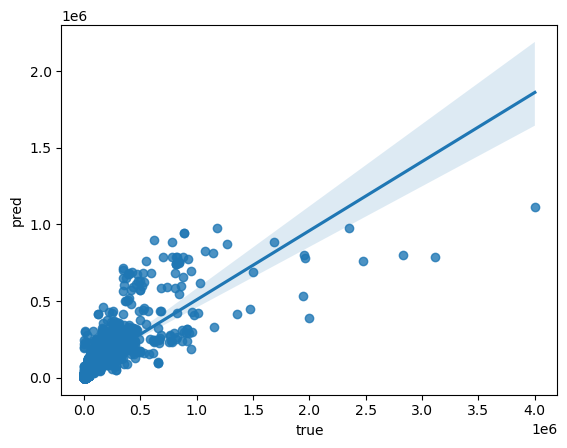

In [42]:
sns.regplot(results['true'], results['pred'])